In [27]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
import cv2
import PIL.Image as Image
import requests
from io import BytesIO
from sklearn.model_selection import train_test_split

In [28]:
import tensorflow as tf
import tensorflow_hub as hub

# Dataset Loading
IMAGE_SHAPE = (224, 224)
classifier = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4")(x),
                           input_shape=IMAGE_SHAPE + (3,))
])


# Using Pre Trained Model to Image Classfication

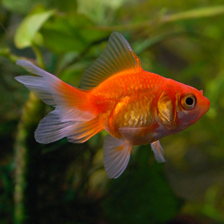

In [29]:
# URL of the image
image_url = 'https://raw.githubusercontent.com/codebasics/deep-learning-keras-tf-tutorial/master/18_transfer_learning/goldfish.jpg'

# Send a GET request to the URL to get the image content
response = requests.get(image_url)

# Read the content of the response (image data)
image_data = response.content

# Open the image using PIL
gold_fish = Image.open(BytesIO(image_data)).resize(IMAGE_SHAPE)
gold_fish

In [30]:
gold_fish = np.array(gold_fish)/255
gold_fish.shape

(224, 224, 3)

In [31]:
gold_fish[np.newaxis, ...]

array([[[[0.28235294, 0.33333333, 0.07058824],
         [0.31372549, 0.37254902, 0.09019608],
         [0.34901961, 0.41960784, 0.11764706],
         ...,
         [0.32941176, 0.39215686, 0.00392157],
         [0.32156863, 0.38431373, 0.00392157],
         [0.30980392, 0.36862745, 0.        ]],

        [[0.28627451, 0.33333333, 0.08235294],
         [0.3254902 , 0.38039216, 0.10980392],
         [0.35294118, 0.42352941, 0.12941176],
         ...,
         [0.32156863, 0.38039216, 0.00392157],
         [0.31372549, 0.37254902, 0.00392157],
         [0.30196078, 0.36078431, 0.        ]],

        [[0.28627451, 0.33333333, 0.08627451],
         [0.31372549, 0.36862745, 0.10196078],
         [0.34509804, 0.41568627, 0.12941176],
         ...,
         [0.31764706, 0.37647059, 0.00392157],
         [0.30980392, 0.36862745, 0.00784314],
         [0.29803922, 0.35686275, 0.00392157]],

        ...,

        [[0.05490196, 0.10980392, 0.01568627],
         [0.05098039, 0.11372549, 0.01960784]

In [32]:
result = classifier.predict(gold_fish[np.newaxis, ...])
predict_label_index = np.argmax(result)
predict_label_index

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


2

# Use Flower Dataset

In [33]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

In [34]:
data_dir

'./datasets/flower_photos'

In [35]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [36]:
flowers_image_dict = {
    "roses": list(data_dir.glob('roses/*')),
    "daisy": list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*'))
}

In [37]:
flowers_labels_dict = {
    "roses": 0,
    "daisy": 1,
    "dandelion": 2,
    "sunflowers": 3,
    "tulips": 4
}

In [38]:
flowers_image_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/3203779656_3580151ea4_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4396642388_3081a38875_n.jpg'),
 PosixPath('datasets/flower_photos/roses/3667366832_7a8017c528_n.jpg'),
 PosixPath('datasets/flower_photos/roses/8241471746_5d81fdd3c0_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2535466393_6556afeb2f_m.jpg')]

In [39]:
str(flowers_image_dict['roses'][4])

'datasets/flower_photos/roses/2535466393_6556afeb2f_m.jpg'

In [40]:
img = cv2.imread(str(flowers_image_dict['roses'][4]))
img.shape

(240, 191, 3)

In [41]:
cv2.resize(img, IMAGE_SHAPE).shape

(224, 224, 3)

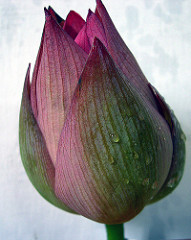

In [42]:
Image.open(str(flowers_image_dict['roses'][4]))

In [43]:
X, y = [], []

for flower_name, images in flowers_image_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, IMAGE_SHAPE)
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [44]:
X = np.array(X) / 255
y = np.array(y)

X[0]

array([[[0.78039216, 0.67058824, 0.74901961],
        [0.78823529, 0.67843137, 0.76078431],
        [0.80392157, 0.69019608, 0.78039216],
        ...,
        [0.15686275, 0.41568627, 0.32941176],
        [0.1372549 , 0.44705882, 0.35294118],
        [0.09019608, 0.41568627, 0.31764706]],

       [[0.78431373, 0.6745098 , 0.75294118],
        [0.79607843, 0.68627451, 0.76470588],
        [0.80784314, 0.69411765, 0.78431373],
        ...,
        [0.07843137, 0.31372549, 0.23921569],
        [0.09803922, 0.36862745, 0.28627451],
        [0.10588235, 0.37647059, 0.29411765]],

       [[0.8       , 0.69019608, 0.76862745],
        [0.80784314, 0.69803922, 0.78039216],
        [0.81960784, 0.70588235, 0.79607843],
        ...,
        [0.0627451 , 0.24705882, 0.18823529],
        [0.10588235, 0.30588235, 0.23921569],
        [0.14509804, 0.33333333, 0.27058824]],

       ...,

       [[0.43921569, 0.41568627, 0.5372549 ],
        [0.43921569, 0.41568627, 0.5372549 ],
        [0.43921569, 0

# Train Test Split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train.shape

(2936, 224, 224, 3)

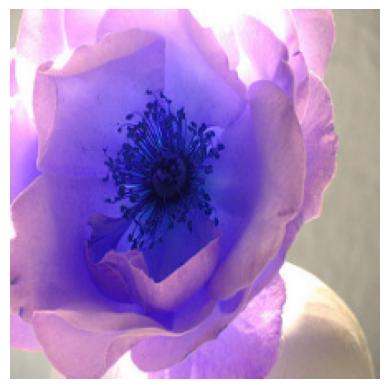

In [46]:
plt.imshow(X[1])
plt.axis("off")
plt.show()

## Use Pretrained model

In [47]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
# Number of flower classes
num_of_flowers = 5

# Create a Sequential model with the pre-trained model and a Dense layer
model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda x: pretrained_model_without_top_layers(x), input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(num_of_flowers)
])

# Display the model summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_3 (Lambda)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │         6,405 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,405 (25.02 KB)

 Trainable params: 6,405 (25.02 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['acc'])
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
 5/92 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - acc: 0.1332 - loss: 2.0732

W0000 00:00:1709912866.075810     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


92/92 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - acc: 0.5171 - loss: 1.2077
Epoch 2/5
 5/92 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - acc: 0.7620 - loss: 0.5650

W0000 00:00:1709912870.275506     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - acc: 0.8396 - loss: 0.4556
Epoch 3/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - acc: 0.8934 - loss: 0.3381
Epoch 4/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - acc: 0.9148 - loss: 0.2628
Epoch 5/5
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - acc: 0.9354 - loss: 0.2336


In [49]:
model.evaluate(X_test, y_test)

 5/23 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - acc: 0.8678 - loss: 0.2898

W0000 00:00:1709912884.510044     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - acc: 0.8803 - loss: 0.3345


W0000 00:00:1709912886.542357     107 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


[0.3583592176437378, 0.8841961622238159]